# Topics in Market Microstructure Models - Homework 1 Solution

Assigned: July 12, 2016.
Due: July 19, 2016 by 1pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this Jupyter notebook to Xinquan Chen (cxq_ccer@163.com) and Tai-Ho Wang (tai-ho.wang@baruch.cuny.edu) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or Jupyter notebook, please contact your TA Xinquan Chen.


## The Smith Farmer zero-intelligence model

### Download R code

The following code sources *ziSetup.R* which has all the functions required for the problem.

In [1]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSetup.zip", destfile="ziSetup.zip")
unzip(zipfile="ziSetup.zip")

In [2]:
source("ziSetup.R")

### 1. (4 points)

Using the provided functions in *ziSetup.R* (with $\alpha = 1$, $\mu = 10$, $\delta = 1/5$),
initialize the order book and add two orders to the (best) bid side of the book. The resulting
book should have 3 orders at best bid and 1 order at best offer. Plot the resulting book
shape.

#### <font color=blue>Solution </font>

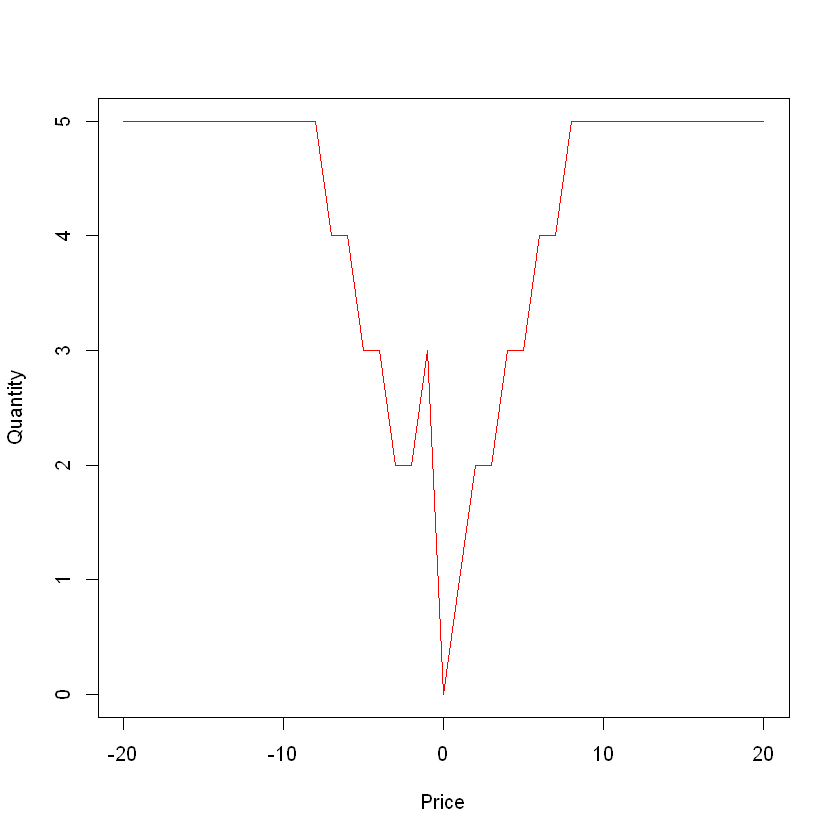

In [3]:
# Problem 2.
# Simulate and generate time series of returns

logging <- F

alpha <-1; mu<-10; delta <- 0.2; # Asymptotic book depth is 5
initializeBook5()
limitBuyOrder(-1)
limitBuyOrder(-1)
bookPlot(20)  

### 2. (16 points)

(a) Using the code supplied to generate Figure 2 as a template, simulate 100,000 events, computing the average book shape (in a band $\pm 20$ around the mid price) for the
following sets of parameters:

|$\alpha$|$\mu$|$\delta$|
-----|-----:|-------:|
I| 1 | 10 | $\frac15$
II| 1 | 8 |  $\frac15$
III| 1 |  10 | $\frac16$
IV| 1  | 10 | $\frac18$ 

<font color=blue> Warning: This might take longer than 15 minutes to run!. </font>


(b) Generate a summary plot of the average book shapes for each parameter set (I, II, II, and IV).

(c) Verify that the relationships between the slopes of the order books at-the-money for each parameter set are consistent with the predictions from dimensional analysis.

(d) Verify that the asymptotic book depths are consistent with the predictions from dimensional analysis.

#### <font color=blue> Solution (a), (b) </font>

In [ ]:
# Problem 2.  Generate average book shapes

# Compute average bookshape
logging <- F

# Either run code or cheat by loading the following data
# load("avgBookShapes.rData")

#------------------
# Parameter set I
alpha <- 1
mu <- 10
delta <- 1/5 
initializeBook5()
# Burn in for 1000 events
for(count in 1:1000){
  generateEvent()
}
numEvents <- 1e5 # Average over 10,000 events
avgBookShape <- bookShape(20)/numEvents
system.time(
for(count in 2:numEvents){
  generateEvent()
  avgBookShape <- avgBookShape+bookShape(20)/numEvents
})

plot(-20:20,avgBookShape,main=NA,xlab="Relative price",ylab="# Shares", col="red", type="b")
absMu10Del5 <-avgBookShape

#------------------
# Parameter set II
alpha <- 1
mu <- 8
delta <- 1/5 
initializeBook5()
# Burn in for 1000 events
for(count in 1:1000){
  generateEvent()
}
numEvents <- 100000 # Average over 10,000 events
avgBookShape <- bookShape(20)/numEvents
system.time(
  for(count in 2:numEvents){
    generateEvent()
    avgBookShape <- avgBookShape+bookShape(20)/numEvents
  })

plot(-20:20,avgBookShape,main=NA,xlab="Relative price",ylab="# Shares", col="red", type="b")
absMu8Del5 <-avgBookShape

#------------------
# Parameter set III
alpha <- 1
mu <- 10
delta <- 1/6 
initializeBook5()
# Burn in for 1000 events
for(count in 1:1000){
  generateEvent()
}
numEvents <- 100000 # Average over 10,000 events
avgBookShape <- bookShape(20)/numEvents
system.time(
  for(count in 2:numEvents){
    generateEvent()
    avgBookShape <- avgBookShape+bookShape(20)/numEvents
  })

plot(-20:20,avgBookShape,main=NA,xlab="Relative price",ylab="# Shares", col="red", type="b")
absMu10Del6 <-avgBookShape

#------------------
# Parameter set IV
alpha <- 1
mu <- 10
delta <- 1/8 
initializeBook5()
# Burn in for 1000 events
for(count in 1:1000){
  generateEvent()
}
numEvents <- 100000 # Average over 10,000 events
avgBookShape <- bookShape(20)/numEvents
system.time(
  for(count in 2:numEvents){
    generateEvent()
    avgBookShape <- avgBookShape+bookShape(20)/numEvents
  })

plot(-20:20,avgBookShape,main=NA,xlab="Relative price",ylab="# Shares", col="red", type="b")
absMu10Del8 <-avgBookShape

# Summary plot
par(mfrow=c(2,2))
plot(-20:20,absMu10Del5,main="Parameters I",xlab="Relative price",ylab="# Shares", col="red", type="b")
plot(-20:20,absMu8Del5,main="Parameters II",xlab="Relative price",ylab="# Shares", col="red", type="b")
plot(-20:20,absMu10Del6,main="Parameters III",xlab="Relative price",ylab="# Shares", col="red", type="b")
plot(-20:20,absMu10Del8,main="Parameters IV",xlab="Relative price",ylab="# Shares", col="red", type="b")
par(mfrow=c(1,1))


(slopeI <- (absMu10Del5[17]+absMu10Del5[25]-2*absMu10Del5[21])/8)
(slopeII <- (absMu8Del5[17]+absMu8Del5[25]-2*absMu8Del5[21])/8)
(slopeIII <- (absMu10Del6[17]+absMu10Del6[25]-2*absMu10Del6[21])/8)
(slopeIV <- (absMu10Del8[17]+absMu10Del8[25]-2*absMu10Del8[21])/8)

# Compare ratios
c(slopeI,slopeII,slopeIII,slopeIV)/c(.5,.625,.6,.8)

# save(absMu10Del5,absMu8Del5,absMu10Del6,absMu10Del8,file="avgBookShapes.rData")

#### <font color=blue> Solution (c) </font>

From linear regression (or estimating with a ruler), ATM book slopes for parameter sets I, II, III and IV are in the correct ratios:

|$\frac{\alpha^2}{\mu\delta}$|Experiment|Ratio|
-----|-----:|-------:|
I| $\frac12$ | 0.64 | 1.28
II| $\frac58$ | 0.77 | 1.23
III| $\frac35$ |  0.77 | 1.28
IV| $\frac45$  | 1.00 | 1.25 


#### <font color=blue> Solution (d) </font>
Asymptotic book depths for parameter sets I, II, III and IV are 5, 5, 6, and 8 respectively, as predicted from dimensional analysis which gives $\frac\alpha\delta$.

### The following code sets up the data required for Problem 3.

In [1]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/01/ziSimResults.rData_.zip", destfile="ziSimResults.rData.zip")
unzip(zipfile="ziSimResults.rData.zip")
load("ziSimResults.rData")

### 3. (12 points)

The datafile *ziSimResults.rData* contains a list of bid and ask prices after 100 events resulting from 10,000 simulations of the SFGK model with $\alpha = 1$, $\mu = 10$, and $\delta = 1/5$. The $j$th element of the list has results for an initial book configuration with $q_b = j$ shares on the bid side and $q_a = 1$ share on the ask side.

In [5]:
head(data.frame(ziSimResults))

,bid,ask,bid.1,ask.1,bid.2,ask.2,bid.3,ask.3,bid.4,ask.4,bid.5,ask.5,bid.6,ask.6,bid.7,ask.7,bid.8,ask.8,bid.9,ask.9
1,-1,2,-2,2,-2,4,-1,3,-1,3,-1,2,-1,2,0,3,-1,2,-1,0
2,-1,4,-3,-1,-2,3,1,3,-2,1,-1,0,-1,3,0,4,-1,1,1,2
3,-2,-1,-1,0,-1,0,-1,3,-2,2,-1,2,2,3,-1,1,-1,1,-1,0
4,0,3,-2,3,-2,3,-2,1,0,3,-1,2,-1,1,-1,2,-1,0,-1,3
5,-2,2,0,4,0,3,3,5,-2,2,0,3,-1,2,-1,2,-1,2,1,3
6,-2,0,-4,1,-1,1,-3,2,-1,3,1,3,-1,1,1,2,3,4,2,3


(a) For each size $q_b$ at best bid, compute the mean mid-price after 10,000 events and with error computed as standard deviation of the mean.

(b) Plot mean mid-price vs size at best bid, reproducing Figure 3 of the lecture slides. 
Remember to include error bars!

(c) Repeat part (b) with the order book imbalance $I$ on the x-axis, reproducing Figure 7 in the lecture slides.

(d) If you see an order book with large quantity at the bid and small quantity at the offer, what does it tell you about the future price?

#### <font color=blue> 3(a) Solution </font>

In [6]:
n <- 10
meanPx <- numeric(n)
errPx <- numeric(n)
for (j in 1:n){
	tmp <- ziSimResults[[j]]
	mid <- (tmp$a+tmp$b)/2
	meanPx[j] <- mean(mid)
	errPx[j] <- sd(mid)/sqrt(length(mid))
	}

In [7]:
data.frame(meanPx,errPx)

,meanPx,errPx
1,0.0059,0.01537986
2,0.2155,0.0143163
3,0.4135,0.01310835
4,0.56635,0.01229115
5,0.6685,0.01123358
6,0.7411,0.01038017
7,0.8053,0.01019091
8,0.80955,0.009888385
9,0.8388,0.009779878
10,0.83435,0.009617315


#### <font color=blue> 3(b) Solution </font>

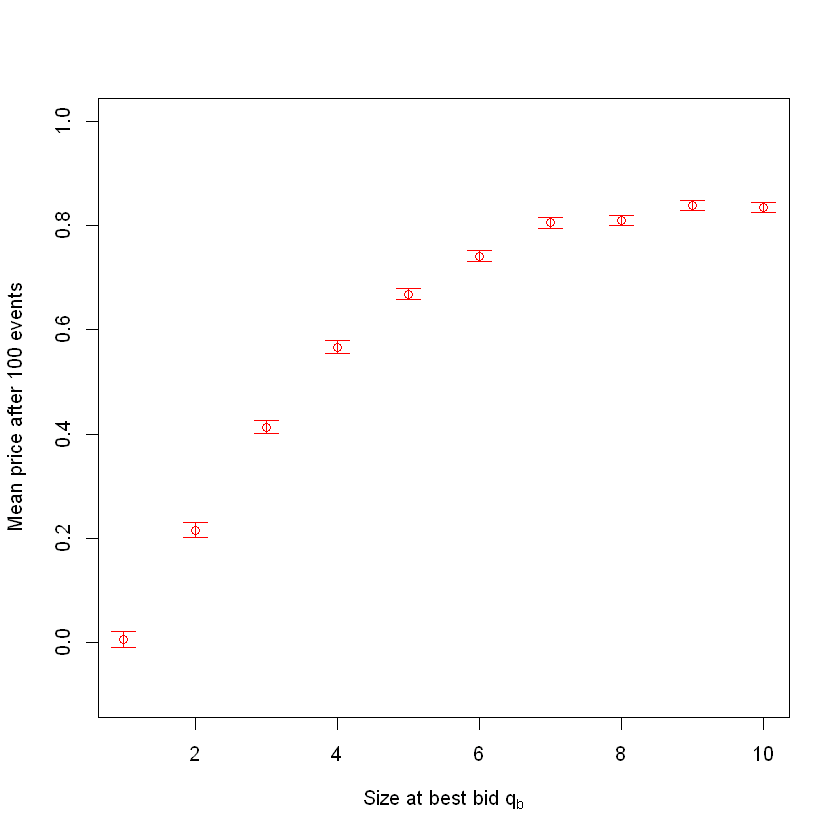

In [8]:
x <- 1:n
plot(x,meanPx,ylim=c(-.1,1),col="red",xlab=expression(paste("Size at best bid ",q[b])),ylab="Mean price after 100 events")

#Add error bars
arrows(x,meanPx+errPx,x,meanPx-errPx,angle=90,code=3,length=.1,col="red")

#### <font color=blue> 3(c) Solution </font>

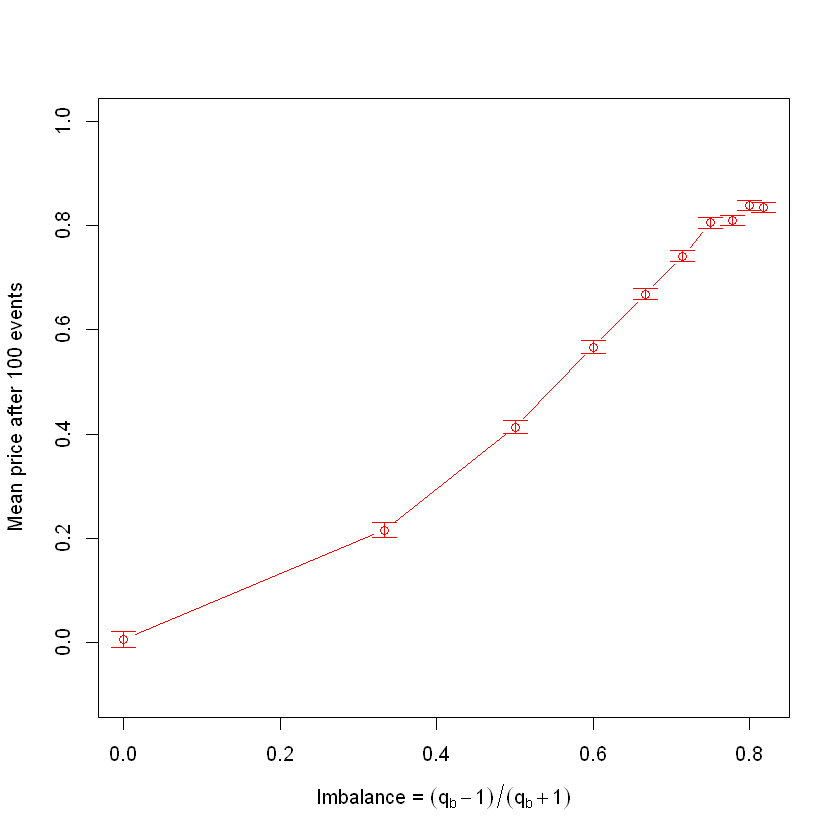

In [9]:
imbalance <- (x-1)/(x+1)
plot(imbalance,meanPx,ylim=c(-.1,1),col="red",xlab=expression(paste("Imbalance = ",(q[b]-1)/(q[b]+1))),ylab="Mean price after 100 events",type="b")

#Add error bars
arrows(imbalance,meanPx+errPx,imbalance,meanPx-errPx,angle=90,code=3,length=.1,col="red")

#### <font color=blue> 3(d) Solution </font>
If there is more on the bid than the ask side of the order book, the price is expected
to increase.